# **Results**

In [25]:
import matplotlib.pyplot as plt
import pickle
import cv2

import numpy as np
import pandas as pd

# For our classifiers
from sklearn import neural_network
from sklearn import preprocessing

from os import listdir
from os.path import isfile, join

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits 

### Load Classifiers

In [23]:
with open('clf_digi.pk', 'rb') as fin:
    clf_digi = pickle.load(fin)
with open('clf_math.pk', 'rb') as fin:
    clf_math = pickle.load(fin)
with open('clf_all.pk', 'rb') as fin:
    clf_all = pickle.load(fin) 

### get list of images

In [28]:
symbols = [str(x) for x in range(10)]

file_lists = {}
for symbol in symbols:
    mypath =  "img/"+symbol+"s"
    file_lists[symbol] = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [31]:
file_lists["1"]

['8.png',
 '9.png',
 '14.png',
 '12.png',
 '13.png',
 '11.png',
 '10.png',
 '4.png',
 '5.png',
 '7.png',
 '6.png',
 '2.png',
 '3.png',
 '1.png',
 '0.png']

### Load Image

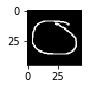

In [21]:


images = {} 

for symbol in symbols:
    img = cv2.imread("img/0s/0.png")
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.show()

The classifiers accept a 28x28 greyscale img. We need to convert our images to a format that the classifiers accept. The images come with varying sizes and are encoded using RGB.

#### Grayscale/Thresholding

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(4, 4))
fig.tight_layout(pad=0.25)


axs[0].imshow(img)
axs[0].set_title("Default")

# Grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
axs[1].imshow(img_gray, cmap="Greys_r")
axs[1].set_title("Grayscale")

# Threshold
_, img_thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV)
axs[2].imshow(img_thresh, cmap="Greys_r")
axs[2].set_title("Threshold")

plt.show()

#### Resizing

In [ ]:
print("Img shape before resizing:", img_thresh.shape)
resized_img_28 = cv2.resize(img_thresh, (28, 28))
resized_img_45 = cv2.resize(img_thresh, (45, 45))
print("Img shape after resizing:", resized_img_28.shape)
print("Img shape after resizing:", resized_img_45.shape)

fig, axs = plt.subplots(1,3, figsize=(4, 4))
fig.tight_layout(pad=0.25)

axs[0].imshow(img_thresh)
axs[0].set_title("Default")

axs[1].imshow(resized_img_28)
axs[1].set_title("Default")

axs[2].imshow(resized_img_45)
axs[2].set_title("Default")

plt.show()

### Classification

In [ ]:
lookup = {
    "0" : 0,
    "1" : 1,
    "2" : 2,   
    "3" : 3,
    "4" : 4,
    "5" : 5,
    "6" : 6,
    "7" : 7,
    "8" : 8,
    "9" : 9,
    "(" : 0,
    ")" : 1,
    "+" : 2,
    "-" : 3,
    "/" : 4,
}

In [ ]:
symbol = lookup[clf_digit.predict([resized_img_28.ravel()])[0]]
print("Digit Classification:")
print("\tSymbol",symbol)
print("\tConfidence",clf_digit.predict_proba([resized_img_28.ravel()])[0][symbol])

symbol = clf_math.predict([resized_img_45.ravel()])[0]
print("Math Classification:")
print("\tSymbol",symbol)
print("\tConfidence",clf_math.predict_proba([resized_img_45.ravel()])[0][lookup[symbol]])

symbol = clf.predict([resized_img_28.ravel()])[0]
print("General Classification:")
print("\tSymbol",symbol)
print("\tConfidence",clf.predict_proba([resized_img_28.ravel()])[0][lookup[symbol]])

In [ ]:
# functions for testing
def compress_array(A, initx, inity, endx, endy):
    arr = (A.reshape(initx,inity)).astype('uint8') # sample array
    im = Image.fromarray(arr) # monochromatic image
    im = im.resize((endx,endy))
    return np.array(im)

def testImg(arr):
    initx = int(np.sqrt(len(arr)))
    inity = initx

    arrM = compress_array(arr, initx, inity, 45, 45).reshape(1,-1)
    arrD = compress_array(arr, initx, inity, 28, 28).reshape(1,-1)

    probM = clf_math.predict_proba(arrM)[0]
    probD = clf_digi.predict_proba(arrD)[0]
    probA = clf_all.predict_proba(arrD)[0]

    print("Math: ------------------------------")
    plt.imshow(arrM.reshape(45,45), cmap=plt.cm.binary)
    plt.title(clf_math.predict(arrM)[0])
    plt.show()
    for p, c in sorted(zip(probM, clf_math.classes_)):
        print(c, "  ::  ", p)

    print("\nDigit: ---------------------------")
    plt.imshow(arrD.reshape(28,28), cmap=plt.cm.binary)
    plt.title(clf_digi.predict(arrD)[0])
    plt.show()
    for p, c in sorted(zip(probD, clf_digi.classes_)):
        print(c, "  ::  ", p)

    print("\nAll: ------------------------------")
    plt.imshow(arrD.reshape(28,28), cmap=plt.cm.binary)
    plt.title(clf_all.predict(arrD)[0])
    plt.show()
    for p, c in sorted(zip(probA, clf_all.classes_)):
        print(c, "  ::  ", p)
        
# Functions for finding combined classification
def predict_as_dictionary(clf, arr, num):
    initx = int(np.sqrt(len(arr)))
    inity = initx
    arr2 = compress_array(arr, initx, inity, num, num).reshape(1,-1)
    return dict(zip(clf.classes_, clf.predict_proba(arr2)[0]))
def classify(arr):
    probM = predict_as_dictionary(clf_math, arr, 45)
    probD = predict_as_dictionary(clf_digi, arr, 28)
    probAll = predict_as_dictionary(clf_all, arr, 28)
    
    prob_M_D = {**probM, **probD}
    
    prob_true = {}
    for symbol in math_symbols+digit_symbols:
        prob_true[symbol] = probAll[symbol]*prob_M_D[symbol]

    print("\n\nCombined prediction ------------------------------------------")
    for i in sorted(zip(prob_true.values(), prob_true)):
        print(i)